In [140]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from random import random

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

import statsmodels.api as sm

## Question 2

**(a)**   (n-1) / n - Every observation has an equal likelihood of being selected. Consequently, the probability of it not be the jth observation is the probability of being all observations but the jth.

**(b)** (n-1) / n

**(c)** The probability is true if “n” selections a required to create the bootstrap sample. Therefore, the probability of the jth observation not being in the bootstrap is (1 – 1/n), i.e. one sample not being the jth observation, to the “n” power.

In [5]:
def prob_occurring(n):
    prob_not = (1 - (1/n)) ** n
    
    return 1 - prob_not

In [10]:
# Q2D

n =5
print("Probability that the jth observation is in the boostrap sample: {:.2%}".format(prob_occurring(n)))

Probability that the jth observation is in the boostrap sample: 67.23%


In [11]:
# Q2E
n = 100
print("Probability that the jth observation is in the boostrap sample: {:.2%}".format(prob_occurring(n)))

Probability that the jth observation is in the boostrap sample: 63.40%


In [12]:
# Q2F
n = 10000
print("Probability that the jth observation is in the boostrap sample: {:.2%}".format(prob_occurring(n)))


Probability that the jth observation is in the boostrap sample: 63.21%


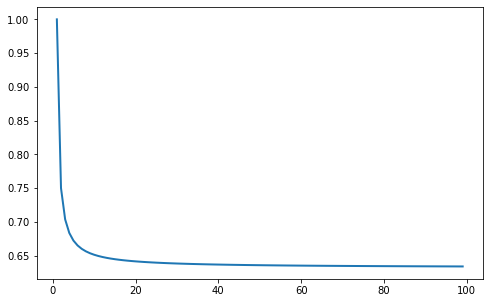

In [22]:
# Q2G

x = np.arange(1, 100)
y = prob_occurring(x)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x, y, linewidth=2)

There's a minumum limit of ~ 63%.

In [51]:
# Q2H
results = []
num_trials = 99999


for dummy_i in range(num_trials):
    values = []
    for dummy_x in range(100):
        values.append(np.random.randint(1, 101))
    
    if 4 in values:
        results.append(1)
    else:
        results.append(0)

expected_val = sum(results) / len(results)

print ("Expected Value: ", round(expected_val, 4))

Expected Value:  0.6319


**OBSERVATIONS:**

The majority of simulations resulted w/ an expected value b/t 0.61 and 0.65. The greater the number of trails, the more often expected value approximated 0.63.

## Question 3

(a) The training set the is partitioned into "k" subsets. The model is fitted on all but one of the subsets. The ommitted subset is used as the validation set. The model performance is assessed on the validation set.

(b) The major drawbacks to the **validation set approach**: (1) The test error rate can be higly variable as it depends on which observations are included in the training and validation sets. (2) Only a subset of the data is used to train the model. Models tend to perform worse when trained on fewer observations.

A drawback to **LOOCV approach** is that it has the potential to be computational expensive. Also, the test error that is derived from LOOCV tends to have **greater** variance than  the test error generated from k-fold CV because **the mean test error derived by LOOCV is calculated from highly correlated values**.

All 3 cross validation methods succeed in identifying the minimum point in the estimated test error curve. When performing hyperparametering tuning, identifying the parameter value that is associated w/ the minimum point on the test error curve is the objective.


## Question 4

- Identify beta_0 and beta_1 - intercept and coefficient -  by fitting the linear regression model on the provided observations.
- Create a bootstrap estimate for the intercept and coefficients by randomly sampling the observations with replacement.
- Calculate the standard errors of 1,000 boostrap estimates for the intercept and slope terms.

## Question 5

In [77]:
default = pd.read_csv('data/default.csv')
default['default_int'] = default['default'].apply(lambda x: 1 if x == 'Yes' else 0)
default['is_student'] = default['student'].apply(lambda x: 1 if x == 'Yes' else 0)
default.head()

,default,student,balance,income,default_int,is_student
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


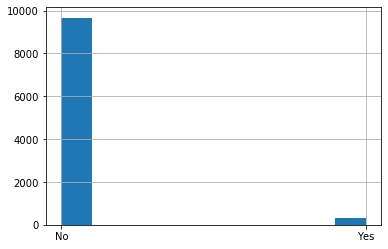

In [58]:
default['default'].hist()

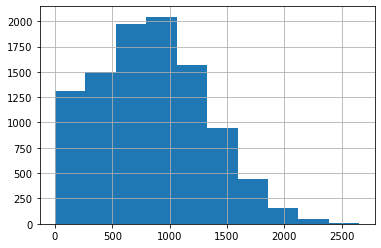

In [60]:
# BALANCE
default['balance'].hist()

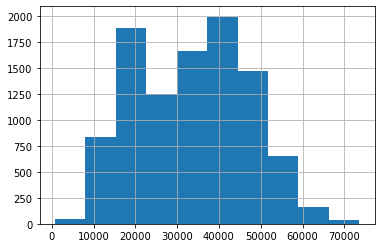

In [62]:
# INCOME
default['income'].hist()

## Question 5A - Log Reg that uses "Income" and "Balance" to predict "Default"

In [130]:
X_q5 = default[['balance', 'income']]
y = default['default_int']

log_reg = LogisticRegression(random_state=3).fit(X_q5, y)
y_pred_q5a = log_reg.predict(X_q5)

print("Test Error: {:.4}".format(1 - accuracy_score(y, y_pred_q5a)))

Test Error: 0.0263


## Question 5B - Use Validation Set Approach

In [131]:
# Train/validation = 50/50
X_train, X_valid, y_train, y_valid = train_test_split(X_q5, y, test_size=0.5, random_state=84)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# automatically assumes a balanced weight, i.e. 0.5 threshold
log_reg = LogisticRegression(random_state=3).fit(X_train_scaled, y_train)
y_pred_q5b = log_reg.predict(X_valid_scaled)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

print("Validation Error: {:.4}".format(1 - accuracy_score(y_valid, y_pred_q5b)))

Validation Error: 0.024


## Question 5C - Repeat Q5B w/ different train and validation set, i.e. "random_state"

In [132]:
# Train/validation = 50/50
X_train, X_valid, y_train, y_valid = train_test_split(X_q5, y, test_size=0.5, random_state=50)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# automatically assumes a balanced weight, i.e. 0.5 threshold
log_reg = LogisticRegression(random_state=3).fit(X_train_scaled, y_train)
y_pred_q5b = log_reg.predict(X_valid_scaled)

print("Validation Error: {:.4}".format(1 - accuracy_score(y_valid, y_pred_q5b)))

Validation Error: 0.0272


In [133]:
# Train/validation = 50/50
X_train, X_valid, y_train, y_valid = train_test_split(X_q5, y, test_size=0.5, random_state=99)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# automatically assumes a balanced weight, i.e. 0.5 threshold
log_reg = LogisticRegression(random_state=3).fit(X_train_scaled, y_train)
y_pred_q5b = log_reg.predict(X_valid_scaled)

print("Validation Error: {:.4}".format(1 - accuracy_score(y_valid, y_pred_q5b)))

Validation Error: 0.0244


In [134]:
# Train/validation = 50/50
X_train, X_valid, y_train, y_valid = train_test_split(X_q5, y, test_size=0.5, random_state=22)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# automatically assumes a balanced weight, i.e. 0.5 threshold
log_reg = LogisticRegression(random_state=3).fit(X_train_scaled, y_train)
y_pred_q5b = log_reg.predict(X_valid_scaled)

print("Validation Error: {:.4}".format(1 - accuracy_score(y_valid, y_pred_q5b)))

Validation Error: 0.0254


Three of the four predictions resulted in a similar test error score. However, one scenario produced test error that was 33% less than the results of the other three scenarios.

## Question 5D - Apply Validation Set method that uses "Income", "Balance", and "is_Student"

In [126]:
X_q5 = default[['balance', 'income', 'is_student']].values
y = default['default_int']

X_train, X_valid, y_train, y_valid = train_test_split(X_q5, y, test_size=0.5, random_state=22)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Model fit and predict
log_reg = LogisticRegression(random_state=3).fit(X_train_scaled, y_train)
y_pred_q5b = log_reg.predict(X_valid_scaled)

print("Validation Error: {:.4}".format(1 - accuracy_score(y_valid, y_pred_q5b)))

Validation Error: 0.0266


In [128]:
# Playwing w/ Chi-Squared
is_student_arr = default['is_student'].values.reshape(-1,1)
default_arr = default['default_int'].values

chi_squared = chi2(is_student_arr, default_arr)

chi_squared

(array([3.43309806e+05, 2.09528694e+04, 8.85252803e+00]),
 array([0.        , 0.        , 0.00292683]))

It seems that including `is_student` has no affect in determining whether someone will default.

C:\Users\morga\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\morga\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


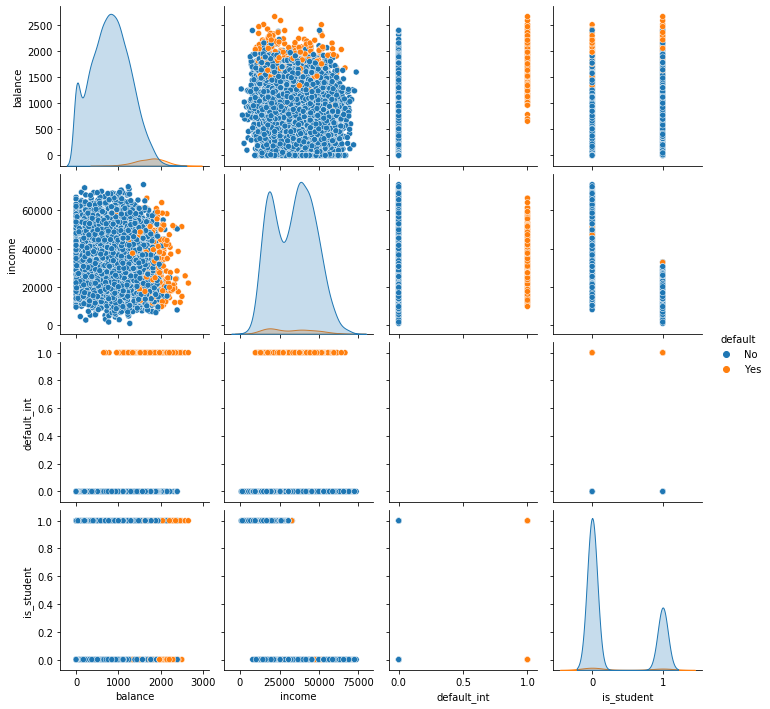

In [137]:
sns.pairplot(default, hue='default')

## Question 6 - Compute Estimates for Standard Error of Logisitic Regression Coefficients

In [144]:
default.shape

(10000, 6)

In [143]:
X_q6 = default[['balance', 'income']]
y = default['default_int']

scaler = StandardScaler()
scaler.fit(X_q6)
X_q6_scaled = scaler.transform(X_q6)

logit_model = sm.Logit(y, X_q6_scaled)
results = logit_model.fit(method='newton')

results.summary()

Optimization terminated successfully.
         Current function value: 0.685125
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_int   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:                  -3.692
Time:                        20:25:04   Log-Likelihood:                -6851.2
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2587      0.021     12.514      0.000       0.218       0.299
x2             0.0249      0.020      1.223      0.221      -0.015       0.065
==============================================================================
"""

In [148]:
def boot(df, n_samples):
    boot_df = pd.DataFrame(columns=['default_int', 'balance', 'income'])
    for dummy_idx in range(n_samples):
        row_idx = np.random.randint(0, df.shape[0])
        boot_df.loc[len(boot_df.index)] = df.iloc[row_idx]
        
    return boot_df

In [153]:
def calc_alpha(X, y):
    return (np.var(y) - np.cov(X, y)) / (np.var(X) + np.var(y) - 2 * np.cov(X, y))

In [149]:
q6_df = default[['default_int', 'balance', 'income']].copy()

bootsampled_set = boot(q6_df, 100)

In [152]:
q6_df.describe()

,default_int,balance,income
count,10000.000000,10000.000000,10000.000000
mean,0.033300,835.374886,33516.981876
std,0.179428,483.714985,13336.639563
min,0.000000,0.000000,771.967729
25%,0.000000,481.731105,21340.462903
50%,0.000000,823.636973,34552.644802
75%,0.000000,1166.308386,43807.729272
max,1.000000,2654.322576,73554.233495


In [151]:
bootsampled_set.describe()

,default_int,balance,income
count,100.000000,100.000000,100.000000
mean,0.040000,805.094841,33350.123804
std,0.196946,472.579913,11918.204556
min,0.000000,0.000000,8637.963307
25%,0.000000,492.020820,23275.608460
50%,0.000000,812.057474,35522.882997
75%,0.000000,1125.226754,42018.880326
max,1.000000,1916.088508,64016.760398
